In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.0'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import os
input_dir = "D:Dataset/dataset/keras_example/Image segmentation with a U-Net-like architecture/images"
target_dir = "D:Dataset/dataset/keras_example/Image segmentation with a U-Net-like architecture/annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 8

In [5]:
input_img_paths = []
for fname in os.listdir(input_dir):
    if fname.endswith(".jpg"):
        tmp = os.path.join(input_dir, fname)
        input_img_paths.append(tmp)
input_img_paths = sorted(input_img_paths)

target_img_paths = []
for fname in os.listdir(target_dir):
    if fname.endswith(".png") and not fname.startswith("."):
        tmp = os.path.join(target_dir, fname)
        target_img_paths.append(tmp)
target_img_paths = sorted(target_img_paths)

In [6]:
print("Number of samples:", len(input_img_paths))

Number of samples: 7390


In [7]:
input_img_paths[0]

'D:Dataset/dataset/keras_example/Image segmentation with a U-Net-like architecture/images\\Abyssinian_1.jpg'

In [8]:
NUM_VALID_IMAGES = 1390
train_image=input_img_paths[NUM_VALID_IMAGES:]
train_mask=target_img_paths[NUM_VALID_IMAGES:]
valid_image=input_img_paths[:NUM_VALID_IMAGES]
valid_mask=target_img_paths[:NUM_VALID_IMAGES]

In [9]:
len(train_image), len(valid_image)

(6000, 1390)

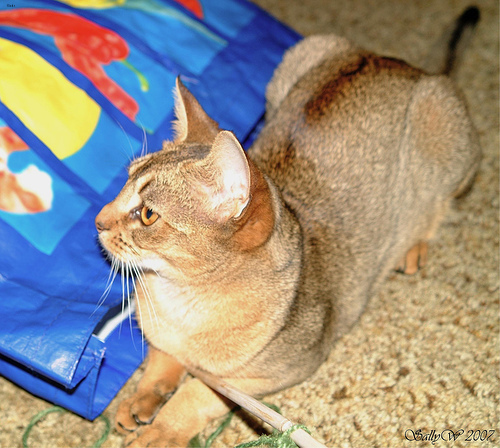

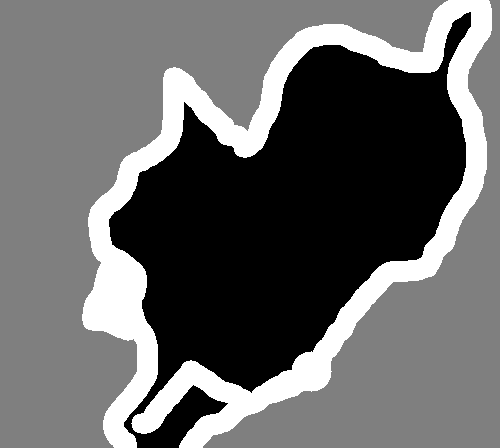

In [10]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [24]:
def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.resize(images=image, size=img_size, method='nearest')
        image = np.expand_dims(image, 1)
    else:
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(images=image, size=img_size)
        image = image / 255
    return image

In [25]:
def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask

In [26]:
def data_generator(image_list, mask_list, data_type=None):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    if data_type =="train":
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.cache()
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [27]:
train_dataset = data_generator(train_image, train_mask, data_type="train")
valid_dataset = data_generator(valid_image, valid_mask)
print("Train Dataset:", train_dataset)
print("Valid Dataset:", valid_dataset)

NotImplementedError: in user code:

    C:\Users\user\AppData\Local\Temp\ipykernel_8348\4011400329.py:3 load_data  *
        mask = read_image(mask_list, mask=True)
    C:\Users\user\AppData\Local\Temp\ipykernel_8348\1061183750.py:6 read_image  *
        image = np.expand_dims(image, 2)
    <__array_function__ internals>:6 expand_dims  **
        
    C:\Users\user\miniconda3\envs\deep_tf\lib\site-packages\numpy\lib\shape_base.py:591 expand_dims
        a = asanyarray(a)
    C:\Users\user\miniconda3\envs\deep_tf\lib\site-packages\numpy\core\_asarray.py:136 asanyarray
        return array(a, dtype, copy=False, order=order, subok=True)
    C:\Users\user\miniconda3\envs\deep_tf\lib\site-packages\tensorflow\python\framework\ops.py:855 __array__
        " a NumPy call, which is not supported".format(self.name))

    NotImplementedError: Cannot convert a symbolic Tensor (resize_1/Squeeze:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [28]:
import numpy as np

In [16]:
for a, b in train_dataset.take(1):
    temp = tf.reshape(b, -1)
    print(temp[:1000])

tf.Tensor(
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2

In [17]:
from tensorflow.keras import layers
from tensorflow import keras

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

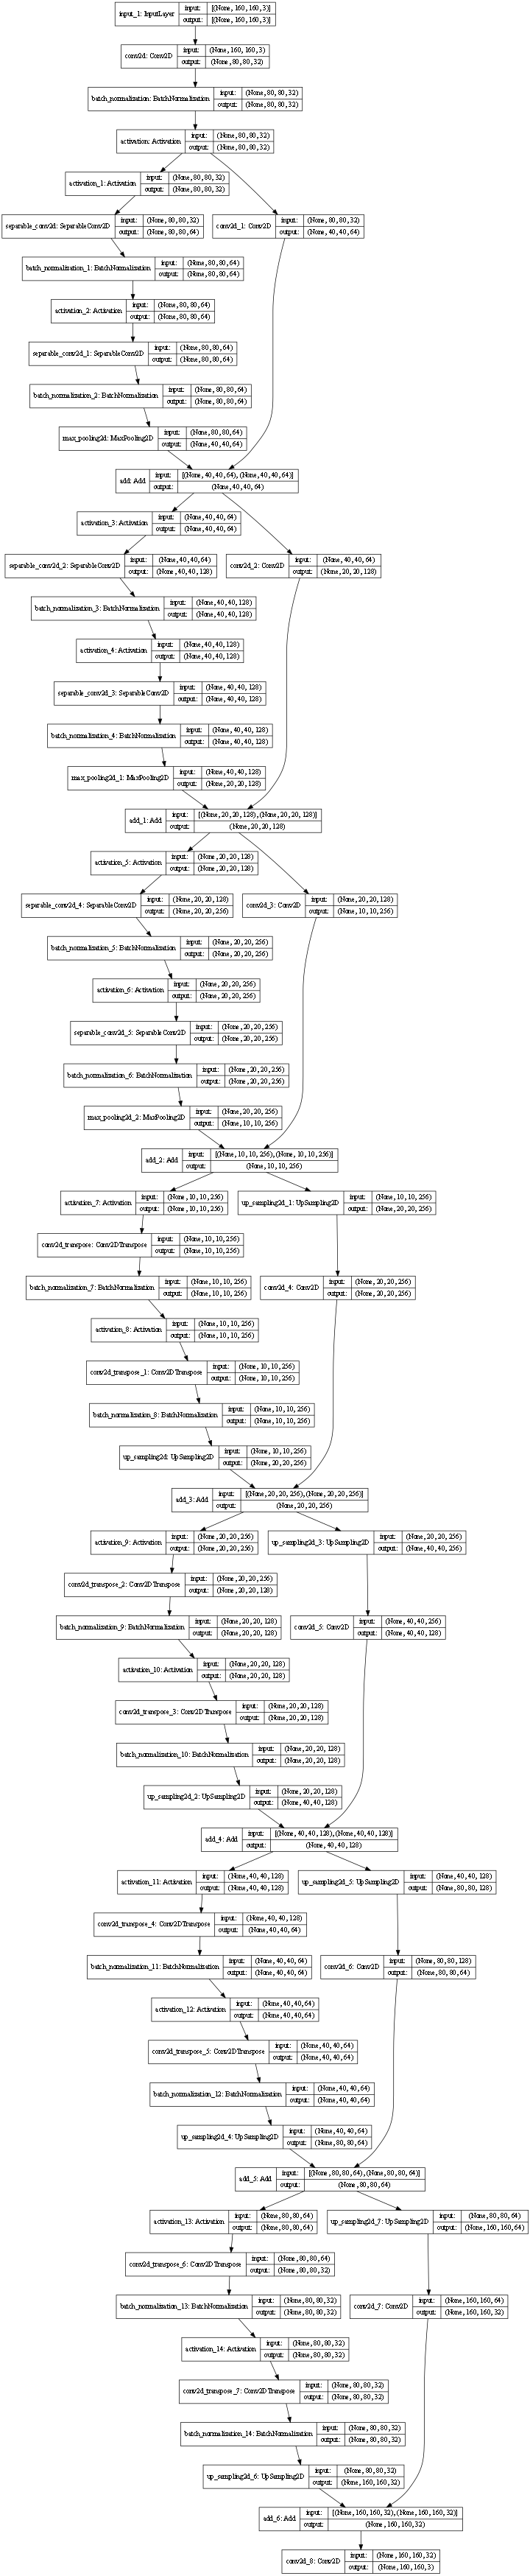

In [18]:
tf.keras.utils.plot_model(model,dpi=50, show_shapes=True)

In [22]:
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [23]:
model.compile(optimizer=opt, loss=loss)

callbacks = [keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)]

model.fit(train_dataset, epochs=2, validation_data=valid_dataset, callbacks=callbacks)

Epoch 1/2
 67/750 [=>............................] - ETA: 29s - loss: nan

KeyboardInterrupt: 

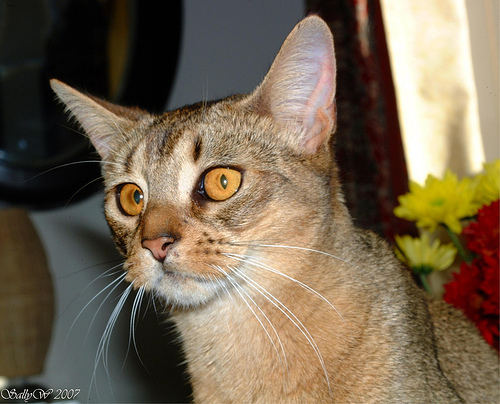

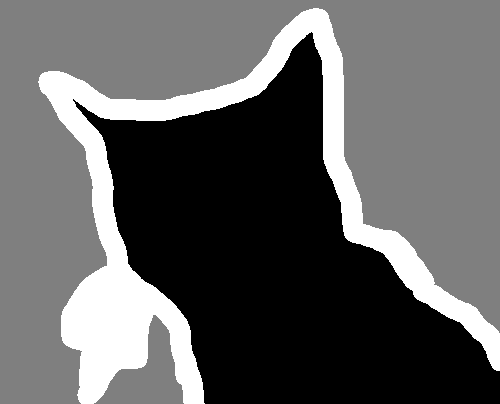

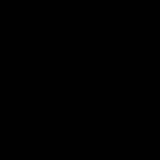

In [21]:
val_preds = model.predict(valid_dataset)
def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)


# Display results for validation image #10
i = 10

# Display input image
display(Image(filename=valid_image[i]))

# Display ground-truth target mask
img = ImageOps.autocontrast(load_img(valid_mask[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.